In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from Config import *

In [3]:
data_1 = pd.read_csv(r"/Reinforcement_Learning_for_Stock_investment/Data/Original_data/mlpart1new.csv")
data_2 = pd.read_csv(r"/Reinforcement_Learning_for_Stock_investment/Data/Original_data/mlpart2new.csv")
data = pd.concat([data_1,data_2])

data["step"] = data["29"]
data["date"] = pd.to_datetime(data["date"], format="%Y%m%d")

data.sort_values(by=["date", "step"], ascending=True, inplace=True, ignore_index=True)

data.drop(labels=["Unnamed: 0", "Unnamed: 0.1", "code", "minute", "29", "33", "40"], axis=1, inplace=True)

print("The shape of data:{}".format(data.shape))

The shape of data:(426261, 54)


count    419091.000000
mean          2.681431
std           3.850636
min          -6.000000
25%           0.760215
50%           1.772228
75%           3.345487
max         131.130665
Name: 48, dtype: float64


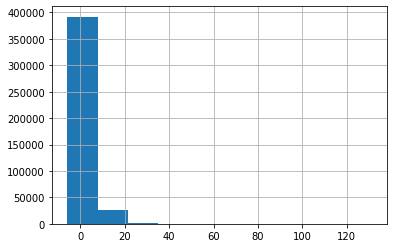

In [4]:
# draw the distribution of one feature
def draw_distribution(column_name="1"):
    data[column_name].hist()
    print(data[column_name].describe())

draw_distribution(column_name="48")

In [5]:
def feature_preprocessing(df):
    """
    preprcess feature according to distribution
    """
    df["1"].clip(lower=-0.02, upper=0.075, inplace=True)
    
    df["2"].clip(upper=0.007, inplace=True)
    
    df["3"].clip(upper=0.025, inplace=True)
    df["3"] = df["3"].apply(lambda x: x**(1/2))
    
    df["6"].clip(upper=0.01, inplace=True)
    
    df["9"] = df["9"].apply(np.log)
    
    df["10"] = (df["10"]+1).apply(np.log)
    
    df["11"] = df["11"].apply(np.log)
    
    df["12"].clip(upper=0.4, inplace=True)
    
    df["13"] = df["13"].apply(lambda x: x**(1/2))
    
    df["18"] = (df["18"]+1).apply(np.log)
    
    df["19"] = (df["19"]+1).apply(np.log)
    
    df["20"] = df["20"].apply(np.log)
    
    df["21"].clip(upper=2, inplace=True)
    
    df["22"].clip(upper=2, inplace=True)
    
    df["23"] = (df["23"]+1).apply(np.log)
    df["23"].clip(upper=1.75, inplace=True)
    
    df["24"] = (df["24"]+1).apply(np.log)
    df["24"].clip(upper=1.75, inplace=True)
    
    df["25"] = (df["25"]+1).apply(np.log)
    df["25"].clip(upper=1.75, inplace=True)
    
    df["26"].clip(lower=-0.05, upper=0.05, inplace=True)
    
    df["27"] = (-df["27"]).apply(lambda x: x**(1/4))
    
    df["28"] = df["28"].apply(lambda x: x**(1/4))
    
    df["30"].clip(lower=-0.4, inplace=True)
    
    df["31"].clip(lower=-0.4, inplace=True)
    
    df["34"] = df["34"].apply(lambda x: x**(1/4))
    
    df["35"] = (-data["35"]).apply(lambda x: x**(1/2))
    
    df["36"] = df["36"].apply(lambda x: x**(1/2))
    
    df["37"] = (df["37"]+0.1).apply(np.log)    
    
    df["38"].clip(upper=2.5, inplace=True)
    
    df["39"].clip(upper=3, inplace=True)
    
    df["41"].clip(lower=-0.025, upper=0.025, inplace=True)
    
    df["42"].clip(lower=-0.025, upper=0.025, inplace=True)
    
    df["45"].clip(lower=-0.1, upper=0.1, inplace=True)
    
    df["46"].replace(np.inf, 1, inplace=True)
    df["46"].clip(upper=1, inplace=True)
    df["46"] = df["46"].apply(lambda x: x**(1/4))
    
    df["47"].clip(lower=-2.5, upper=3, inplace=True)
    
    df["48"] = (data["48"]+6).apply(np.log1p).clip(upper=3.5, lower=1.5)
    
    df["49"].clip(upper=25, inplace=True)
    
    df["51"].clip(lower=-3, upper=10, inplace=True)
    
    return df


data = feature_preprocessing(data)

In [6]:
# Normalization and missing filling（foward fill）
for i in range(53):
    if i not in [29, 33, 40]:
        data[str(i)] = (data[str(i)] - data[str(i)].min()) / (data[str(i)].max() - data[str(i)].min())
        data[str(i)].fillna(0, inplace=True)
        
# print(data.describe())
# print(data.isnull().sum(axis=0))

data.to_csv("/Reinforcement_Learning_for_Stock_investment/Data/New_data/Stock_data.csv", index=False)

In [7]:
train_data = data_split(data, TRAIN_START, TRAIN_END)
validation_data = data_split(data, VALIDATION_START, VALIDATION_END)
test_data = data_split(data, TEST_START, TEST_END)

print("The number of training data:{}".format(len(train_data)))
print("The number of validation data:{}".format(len(validation_data)))
print("The number of testing data:{}".format(len(test_data)))

The number of training data:189281
The number of validation data:29371
The number of testing data:207609
